In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments= SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


EDA and Data Cleaning


In [4]:
data=pd.read_csv("/content/Reviews.csv")

In [5]:
data


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
29936,29937,B000FDLAZ6,AZ5AK5C6ZP84S,Mark D. Griffis,0.0,0.0,5.0,1.326586e+09,Better Than Homemade Without the Time and Hassle,This soup mix makes a tasty addition to any mu...
29937,29938,B000FDLAZ6,AK6J92Q930IFO,"Mrs. M. ""Health Concerns""",0.0,0.0,3.0,1.324166e+09,green leafy vegetable,If you lack dark green vegetables this will su...
29938,29939,B001I8EVZI,A3EUSH8DPW75LR,barry,11.0,11.0,5.0,1.306627e+09,Great coffee when the price is right,I love my coffee and have tried all the name b...
29939,29940,B001I8EVZI,A3S3DNSUREE2NK,"Mistress of The Dark Path ""Suzie""",2.0,2.0,5.0,1.295827e+09,The best flavor for the price,Folgers classic roast has been my trusted bran...


In [7]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,29941.000000,29940.000000,29940.000000,29940.000000,2.994000e+04
mean,14971.000000,1.538744,1.982933,4.153407,1.294560e+09
std,8643.366541,5.186962,5.784720,1.314887,4.703694e+07
min,1.000000,0.000000,0.000000,1.000000,9.617184e+08
25%,7486.000000,0.000000,0.000000,4.000000,1.268438e+09
50%,14971.000000,0.000000,1.000000,5.000000,1.308269e+09
75%,22456.000000,1.000000,2.000000,5.000000,1.329955e+09
max,29941.000000,202.000000,219.000000,5.000000,1.351210e+09


In [10]:
data=data.dropna()

The Score column of this dataset contains the ratings that customers have given to the product based on their experience with the product. So let’s take a look at the rating breakdown to see how most customers rate the products they buy from Amazon:

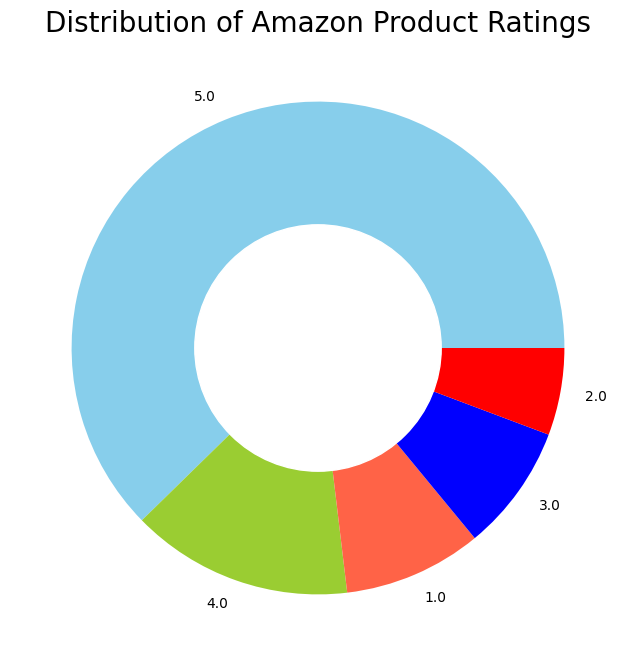

In [11]:
ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

According to the figure above, more than half of people rated products they bought from Amazon with 5 stars, which is good. Now, I’m going to add three more columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the customer reviews mentioned in the Text column of the dataset:

In [14]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]
print(data.head())

<ipython-input-14-65648d19a827>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]
<ipython-input-14-65648d19a827>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
0                   1.0                     1.0    5.0  1.303862e+09   
1                   0.0                     0.0    1.0  1.346976e+09   
2                   1.0                     1.0    4.0  1.219018e+09   
3                   3.0                     3.0    2.0  1.307923e+09   
4                   0.0                     0.0    5.0  1.350778e+09   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality can

<ipython-input-14-65648d19a827>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]


Now let’s see how most people rated the products they bought from Amazon:

In [13]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 
